In [1]:
#@title { display-mode: "form" }
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os


In [3]:
data_dir = '/content/drive/MyDrive/Inteligencia_Artificial/Proyecto/SEMAFOROS/'  # Ruta de tu directorio DataSet en Google Drive
red_dir = os.path.join(data_dir, 'rojo')
green_dir = os.path.join(data_dir, 'verde')

red_images = []
for filename in os.listdir(red_dir):
    img = cv2.imread(os.path.join(red_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convierte las imágenes a RGB si es necesario
    red_images.append(img)

green_images = []
for filename in os.listdir(green_dir):
    img = cv2.imread(os.path.join(green_dir, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convierte las imágenes a RGB si es necesario
    green_images.append(img)


In [25]:
# Redimensionar imágenes
img_size = (50, 50)  # Tamaño de imagen deseado

red_images_resized = []
for img in red_images:
    resized_img = cv2.resize(img, img_size)
    red_images_resized.append(resized_img)

green_images_resized = []
for img in green_images:
    resized_img = cv2.resize(img, img_size)
    green_images_resized.append(resized_img)

# Normalizar imágenes
red_images_normalized = np.array(red_images_resized) / 255.0
green_images_normalized = np.array(green_images_resized) / 255.0

# Crear etiquetas para las imágenes
red_labels = np.zeros(len(red_images_normalized))
green_labels = np.ones(len(green_images_normalized))

X = np.concatenate((red_images_normalized, green_images_normalized), axis=0)
y = np.concatenate((red_labels,green_labels), axis =0)


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [44]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
59/59 [==============================] - 2s 12ms/step - loss: 0.6652 - accuracy: 0.5925 - val_loss: 0.5440 - val_accuracy: 0.8213
Epoch 2/15
59/59 [==============================] - 1s 9ms/step - loss: 0.4949 - accuracy: 0.7651 - val_loss: 0.3490 - val_accuracy: 0.8744
Epoch 3/15
59/59 [==============================] - 0s 7ms/step - loss: 0.3438 - accuracy: 0.8624 - val_loss: 0.3397 - val_accuracy: 0.9082
Epoch 4/15
59/59 [==============================] - 0s 7ms/step - loss: 0.2572 - accuracy: 0.8984 - val_loss: 0.4782 - val_accuracy: 0.7778
Epoch 5/15
59/59 [==============================] - 0s 7ms/step - loss: 0.2282 - accuracy: 0.9129 - val_loss: 0.2389 - val_accuracy: 0.9469
Epoch 6/15
59/59 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.9473 - val_loss: 0.1877 - val_accuracy: 0.9324
Epoch 7/15
59/59 [==============================] - 0s 7ms/step - loss: 0.1236 - accuracy: 0.9527 - val_loss: 0.1671 - val_accuracy: 0.9565
Epoch 8/15
59/59 [=

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


7/7 [==============================] - 0s 4ms/step - loss: 0.2294 - accuracy: 0.9565
Test accuracy: 0.95652174949646


In [46]:
import matplotlib.pyplot as plt

7/7 [==============================] - 0s 3ms/step


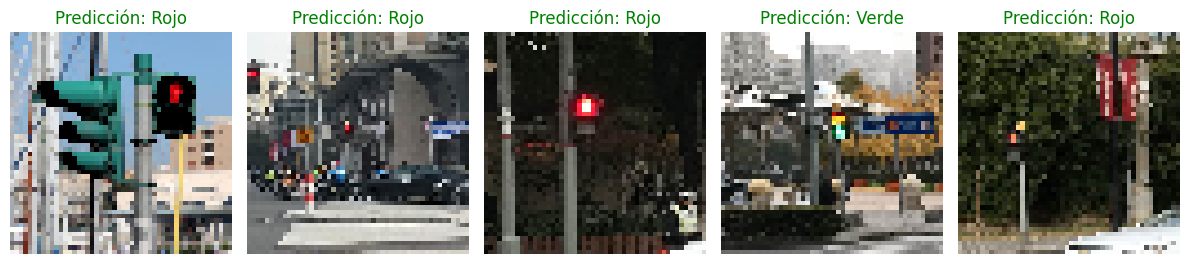

In [35]:
# Obtener las predicciones del modelo para las imágenes de prueba
predictions = model.predict(X_test)

# Seleccionar algunas imágenes de prueba para visualizar
num_images = 5  # Número de imágenes para visualizar

# Obtener índices aleatorios de las imágenes de prueba
random_indices = np.random.choice(len(X_test), size=num_images, replace=False)

# Visualizar las imágenes y las predicciones
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i, index in enumerate(random_indices):
    image = X_test[index]
    prediction = predictions[index]
    label = y_test[index]

    # Configurar el título de la imagen con el resultado de la predicción
    title = 'Predicción: Verde' if prediction > 0.5 else 'Predicción: Rojo'

    # Configurar el color del título según la precisión de la predicción
    title_color = 'green' if (prediction > 0.5 and label == 1) or (prediction <= 0.5 and label == 0) else 'red'

    # Mostrar la imagen y el título en el subplot correspondiente
    axes[i].imshow(image)
    axes[i].set_title(title, color=title_color)
    axes[i].axis('off')

# Ajustar el espaciado entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()
